In [1]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold

In [2]:

# df_TagDesc = pd.read_csv(r'C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\CSV\Not for Processing\TagDesc.csv')

# df_All_1 = pd.read_csv(r'C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\1 Preprocess\Merge Data\contData_all_Avg_1o2.csv')
# df_All_2 = pd.read_csv(r'C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\1 Preprocess\Merge Data\contData_all_Avg_2o2.csv')
# # Concatenate (union) the dataframes
# df_All = pd.concat([df_All_1, df_All_2], ignore_index=True)

df_All = pd.read_csv(r'C:\Users\austinsh\Project-OptiC4\III Models\3 Model STEAM - FC55569\3 Feature Selection\filtered-out_5-9_corr.csv')

print(df_All.head())


                  Date  425_pct_Al     Al2O3  M_Value  C4_pct_Eth  C4_pct_H2O  \
0  2012-05-17 09:00:00    6.319560  11.41670  3.50773    2.554580     22.0531   
1  2012-05-17 10:00:00    6.319915  11.40835  3.50797    2.555935     22.0557   
2  2012-05-17 12:00:00    6.320970  11.39165  3.50869    2.560005     22.0636   
3  2012-05-18 08:00:00    6.328690  11.39165  3.51401    2.540370     22.0604   
4  2012-05-18 09:00:00    6.336060  11.40500  3.51910    2.514430     22.0484   

   HydWtr_pct_Ammonia  C4_pct_Hex  HydWtr_Na2O  Butanol  ...   LC55557  \
0            0.867508    0.670721     3.354160  30.3662  ...  66.31395   
1            0.864729    0.671059     3.306475  30.3662  ...  66.31395   
2            0.856391    0.672071     3.163420  30.6785  ...  66.31395   
3            0.811652    0.674174     2.238130  32.6454  ...  65.92560   
4            0.773793    0.675408     1.391475  32.6454  ...  65.92560   

    LC55568    LC90366   LC90368   PI55004   PI55020   TC55552   TC5

### Include

In [3]:
# selected_columns = ['Butanol', 
#                     'FC55569',
#                     'DI55152',
#                     '425 %Al',
#                     'TC55552',
#                     'FC55003',
#                     'LC55555',
#                     'FFC55553',
#                     'FFC55555',
#                     'TC55555',
#                     'TI55021',
#                     'PI55004',
#                     'FC55552'
#                     ]
# existing_columns = [col for col in selected_columns if col in df_All.columns]
# df_All = df_All[existing_columns]

# print(df_All.head())

In [4]:
# Set max columns to display
pd.set_option('display.max_columns', None)

### Exlcude

In [5]:
# List of columns to exclude to run XGboost feature selection
exclude_columns = [  'Date', 
                    'M_Value',
                    'HydWtr_pct_Ammonia',
                    'HydWtr_Na2O',

                    'PI55004',
                    'Decanol',
                    'LC55557',
                    'LC52572',
                    'LC55568',
                    'LC90368',
                    'LC55553',

                    'TC55552',
                    'FC55009',
                    'TC55555',
                    'FC55552',

                    'FFC55553'

            #      'C4_pct_Hex', 'HydWtr_Na2O',
            #       # No improvement after dropping:
            #      'TC55555'
            #    #   MSE Train	RMSE Train	R2 Train	MSE Test	RMSE Test	R2 Test
            #    #   7.935280	2.8169630	0.90869	12.1856	3.490801	   0.8677
                   
                   ]

# Create a new DataFrame without the excluded columnsd
df_All = df_All.drop(columns=exclude_columns)

In [6]:
df_All.columns

Index(['425_pct_Al', 'Al2O3', 'C4_pct_Eth', 'C4_pct_H2O', 'C4_pct_Hex',
       'Butanol', 'DI55102', 'DI55152', 'DI55580', 'FC55003', 'FC55569',
       'FC55576', 'FFC55555', 'LC90366', 'PI55020', 'TI40050', 'TI55021'],
      dtype='object')

In [7]:
# df_All = df_All[df_All['Date'] > '2020-06-15 00:00:00']

In [8]:
# df_All.drop('Date', axis=1, inplace=True)

In [9]:
print(df_All.describe())

         425_pct_Al         Al2O3    C4_pct_Eth    C4_pct_H2O    C4_pct_Hex  \
count  40127.000000  40127.000000  40127.000000  40127.000000  40127.000000   
mean       6.133716     11.382607      1.213887     21.178645      0.471411   
std        0.228800      0.547831      0.691779      2.750323      0.241196   
min        5.270185      9.740945      0.030786      7.714985      0.000327   
25%        6.003510     11.095875      0.621701     18.843125      0.353947   
50%        6.135865     11.495850      1.103350     21.462900      0.447077   
75%        6.265830     11.719825      1.687807     23.275925      0.546428   
max        7.026215     12.879900      9.466675     34.151950      3.075880   

            Butanol       DI55102       DI55152       DI55580       FC55003  \
count  40127.000000  40127.000000  40127.000000  40127.000000  40127.000000   
mean       9.218873      0.944657      0.932500      0.995820   5994.093426   
std        8.828021      0.051564      0.028840    

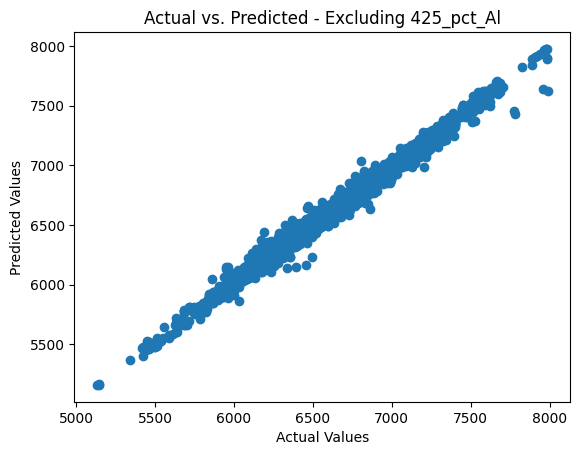

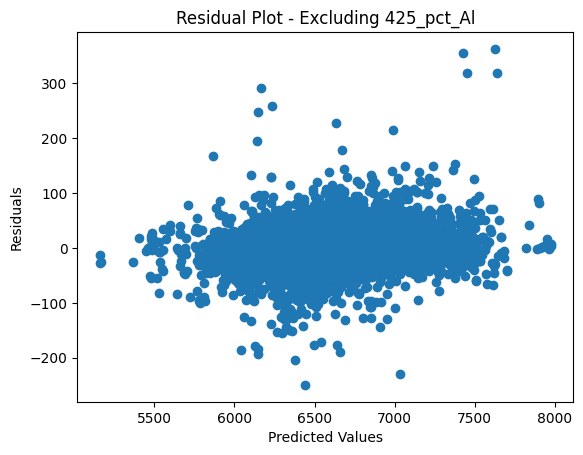

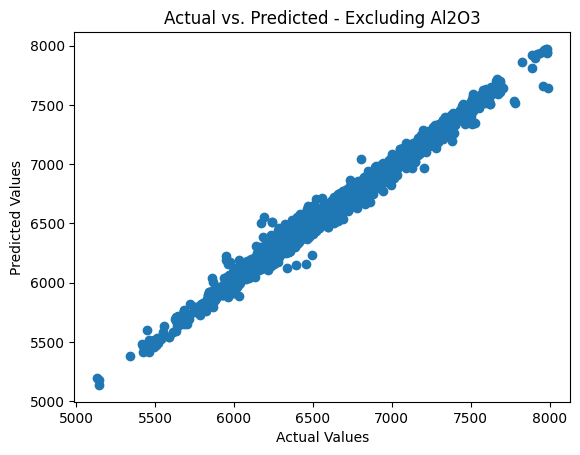

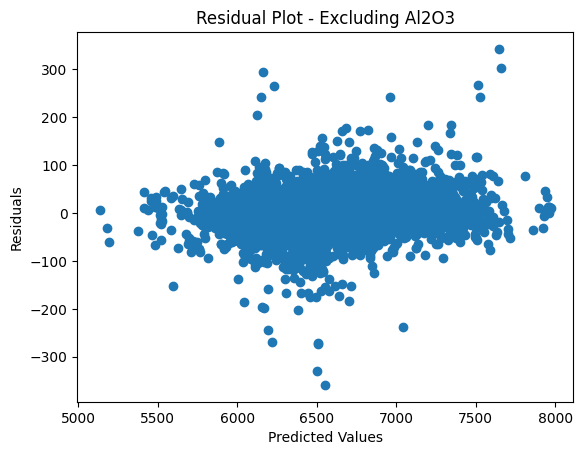

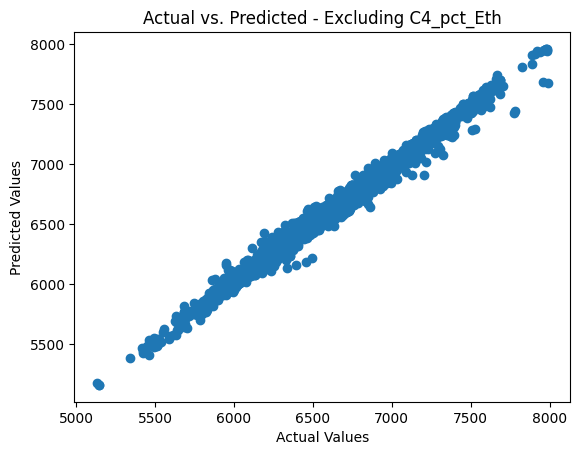

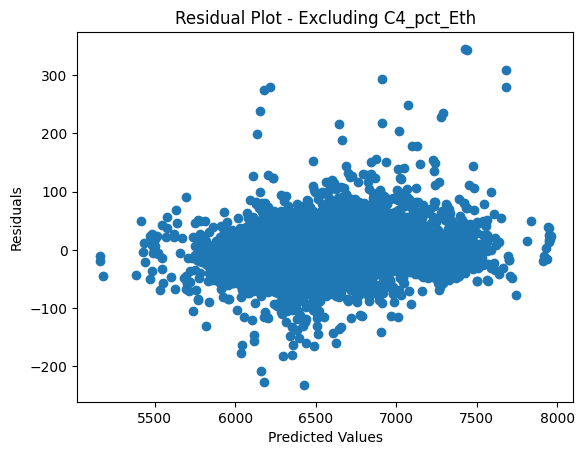

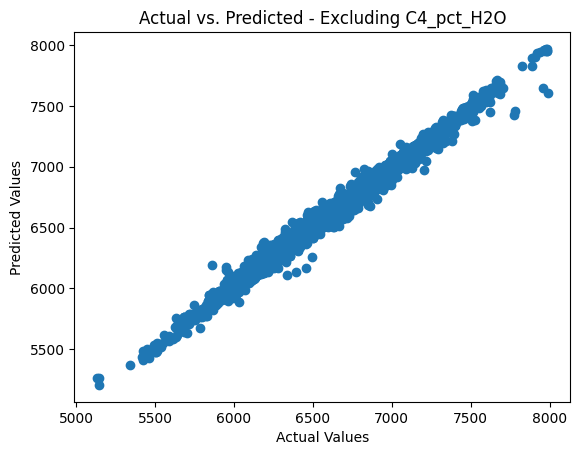

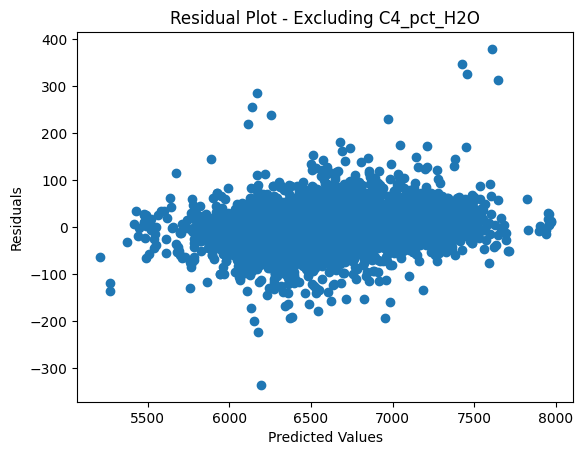

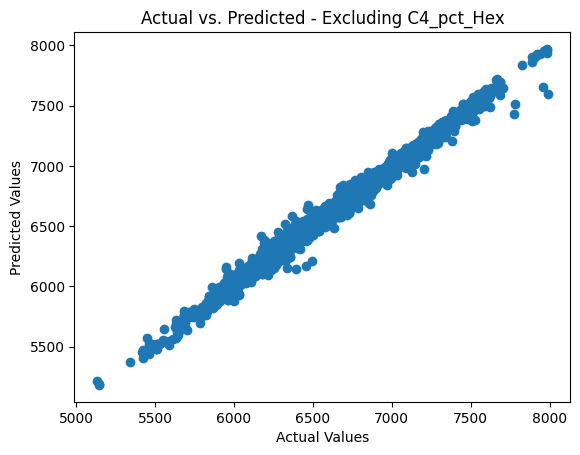

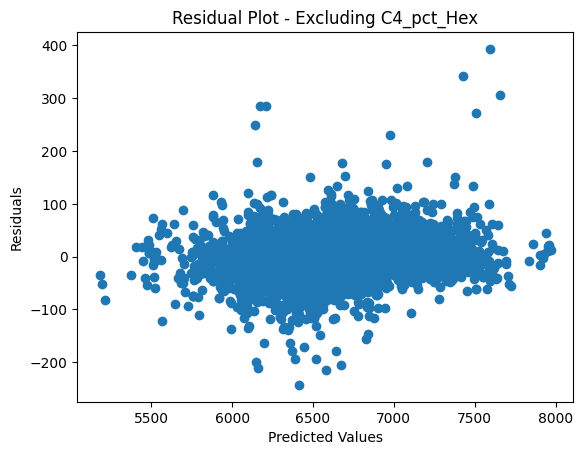

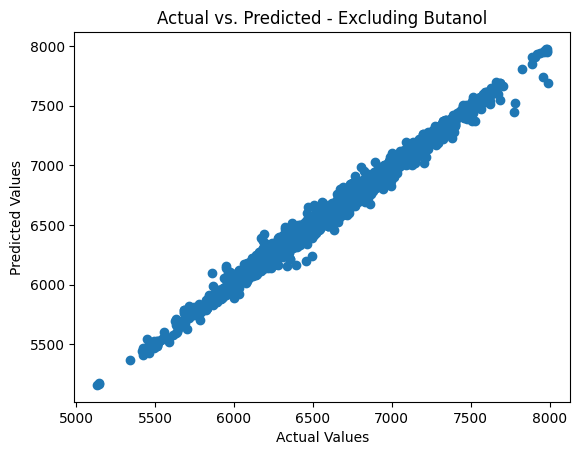

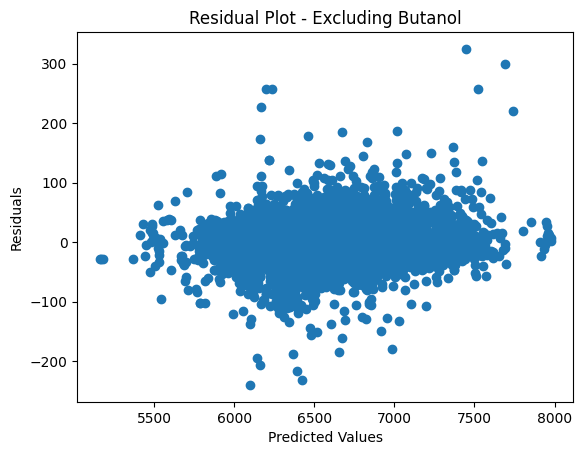

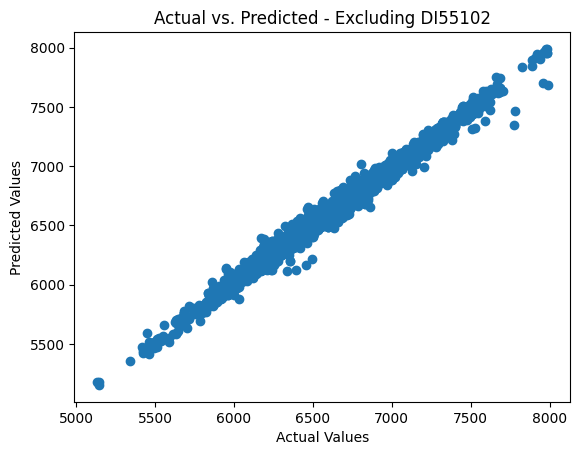

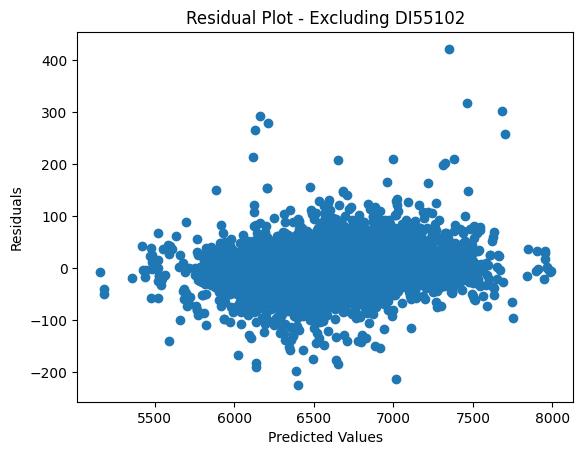

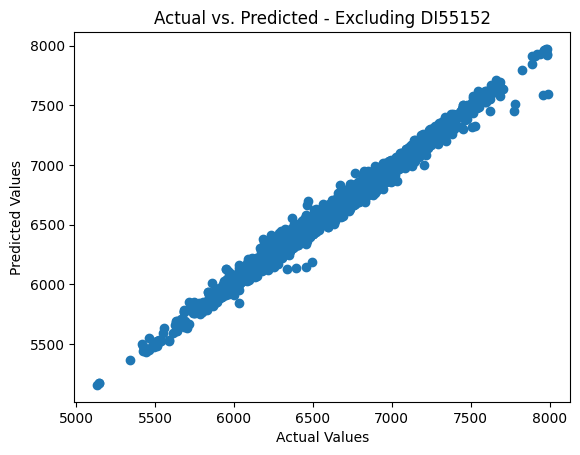

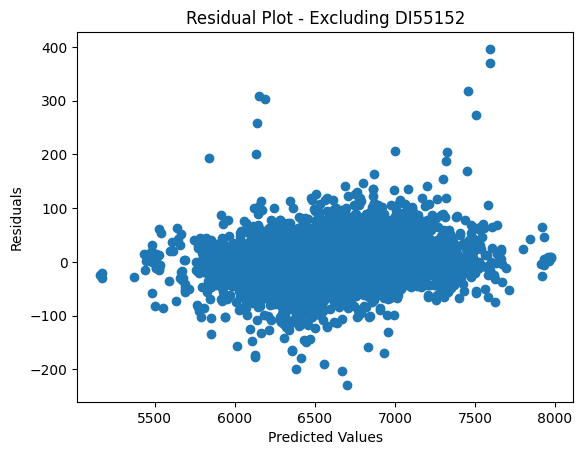

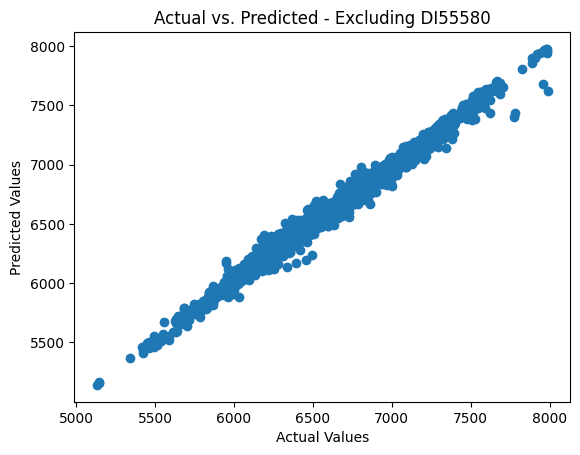

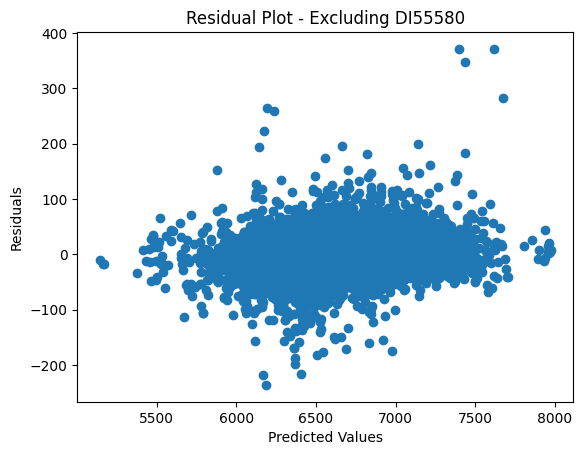

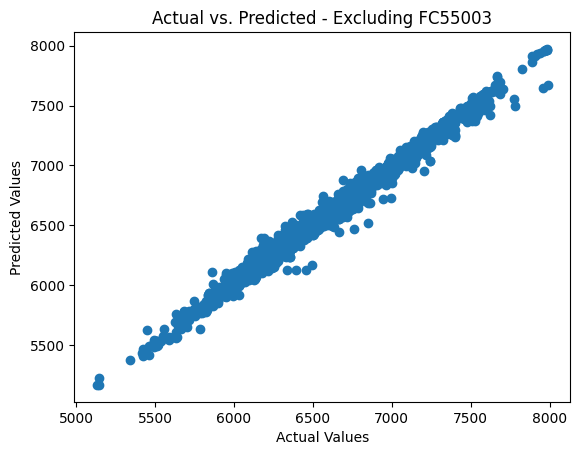

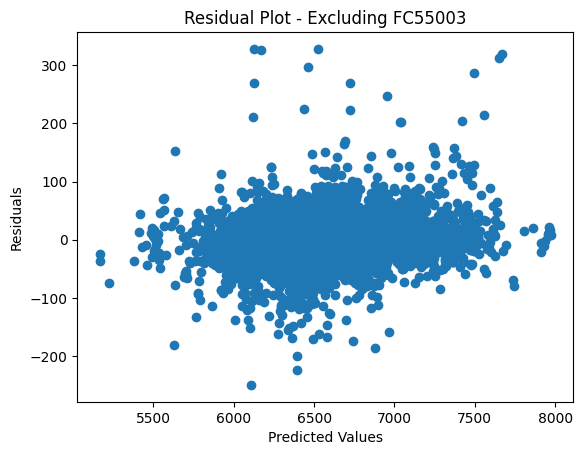

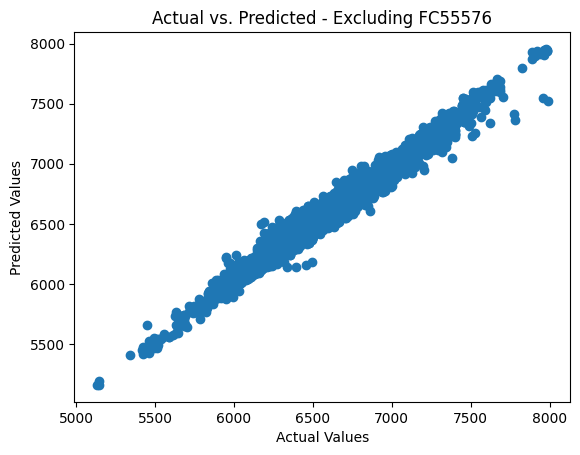

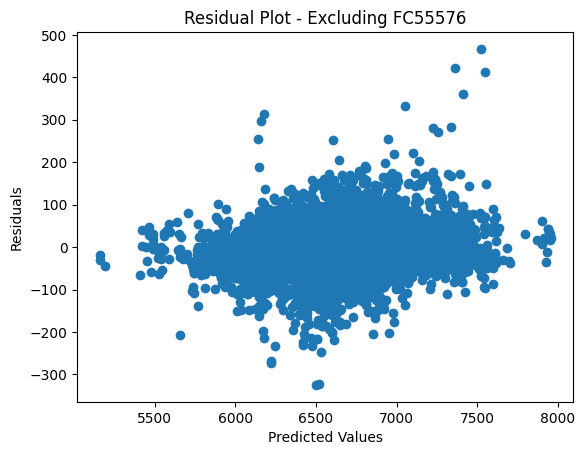

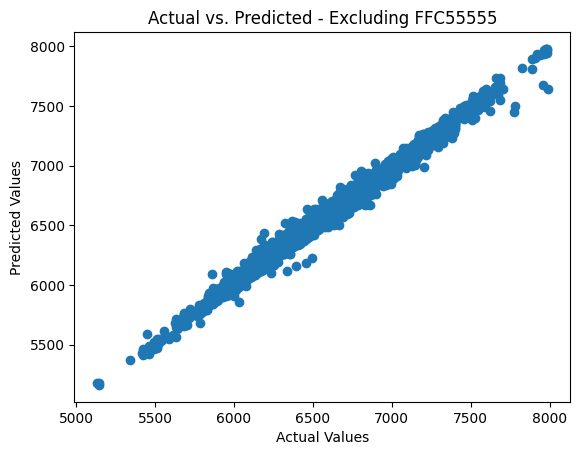

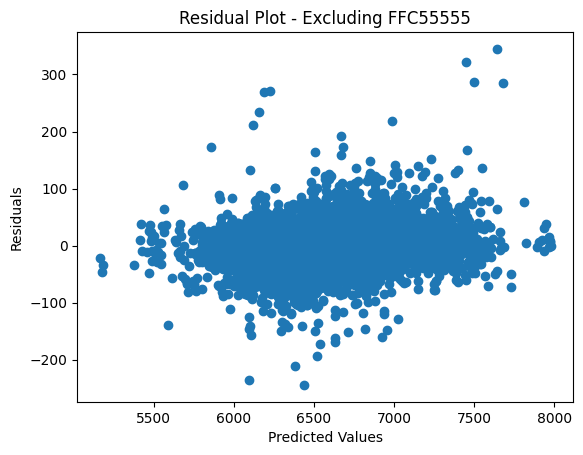

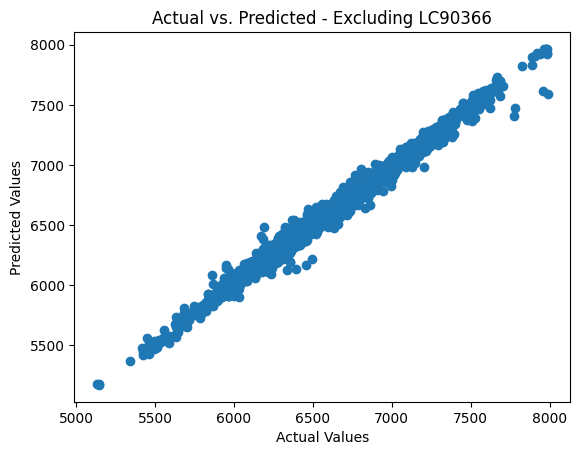

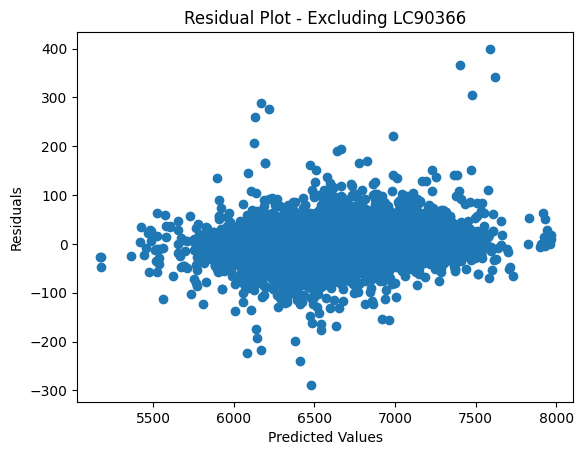

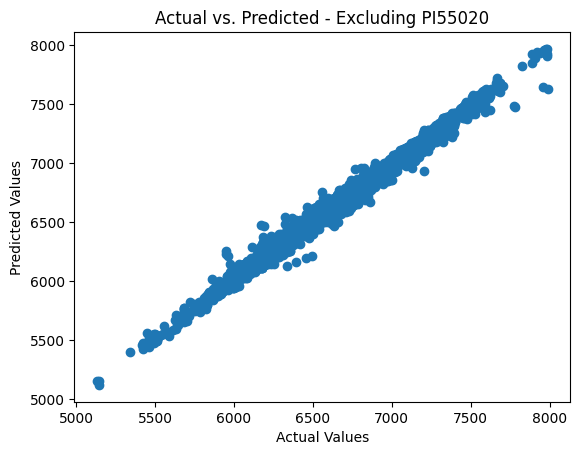

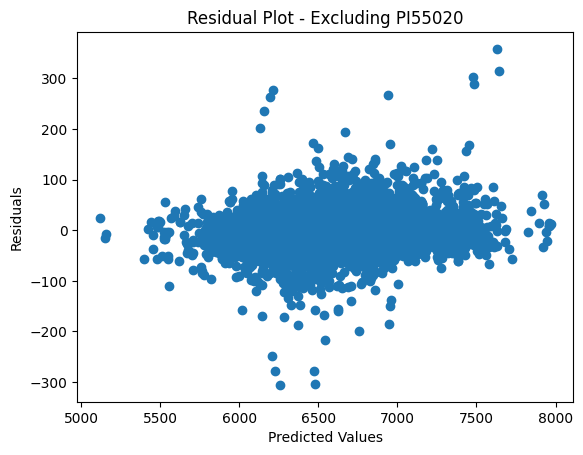

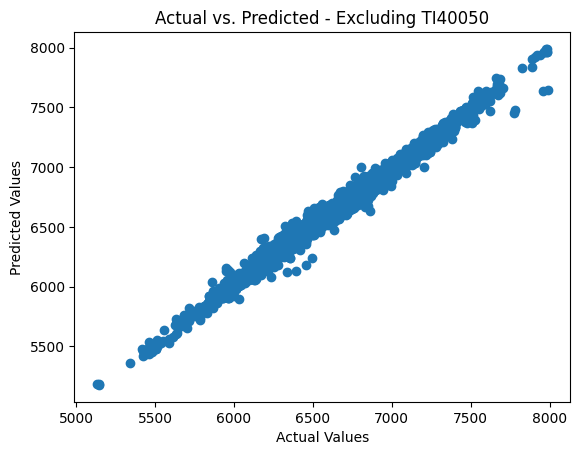

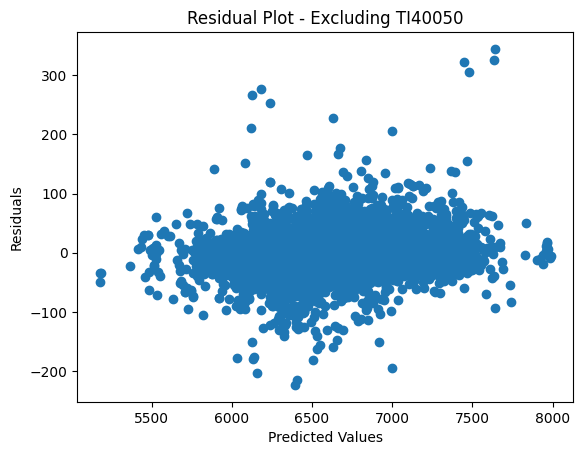

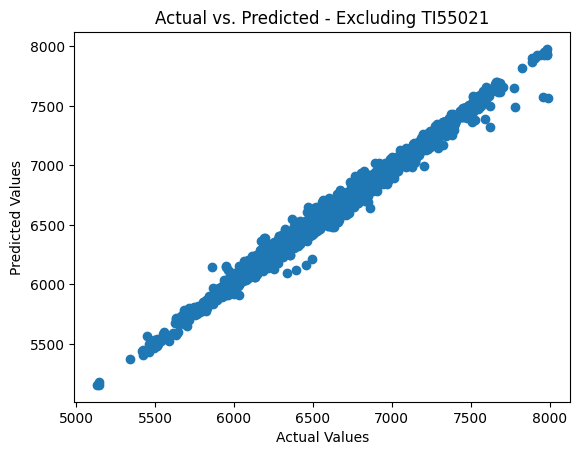

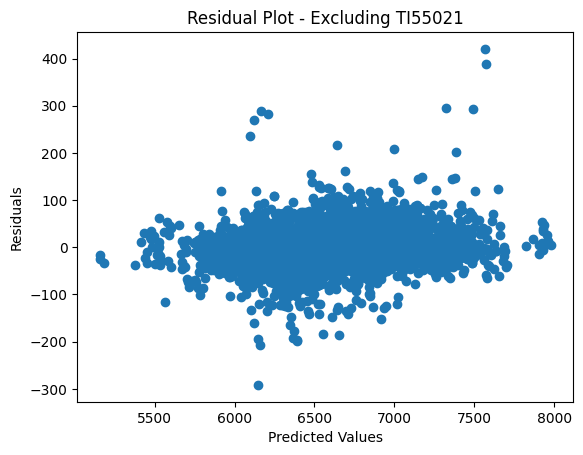

Feature Excluded: 425_pct_Al
MSE Train: 620.8647430209343
RMSE Train: 24.917157603164416
R2 Train: 0.995416175788458
MSE Test: 1078.68671474864
RMSE Test: 32.84336637357139
R2 Test: 0.9918076393608385


Feature Excluded: Al2O3
MSE Train: 757.3873470994029
RMSE Train: 27.520671269055246
R2 Train: 0.9944082338413074
MSE Test: 1314.6817773833557
RMSE Test: 36.25854075088179
R2 Test: 0.9900153148279314


Feature Excluded: C4_pct_Eth
MSE Train: 719.2006283923545
RMSE Train: 26.81791618288704
R2 Train: 0.9946901651439564
MSE Test: 1172.451266386587
RMSE Test: 34.241075718887494
R2 Test: 0.9910955206226687


Feature Excluded: C4_pct_H2O
MSE Train: 661.4383482146033
RMSE Train: 25.718443736248958
R2 Train: 0.9951166221804831
MSE Test: 1166.8284029431336
RMSE Test: 34.15887004780945
R2 Test: 0.9911382248893698


Feature Excluded: C4_pct_Hex
MSE Train: 644.430339036091
RMSE Train: 25.385632531731233
R2 Train: 0.9952421917592665
MSE Test: 1091.151402105016
RMSE Test: 33.03258091801208
R2 Test: 0.

In [10]:

def feature_iteration_model(df, target_column_name, plot_results=False):
    original_features = df.drop(target_column_name, axis=1).columns
    model_performance = {}

    for feature in original_features:
        X = df.drop([target_column_name, feature], axis=1)
        y = df[target_column_name]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        xgb_model = xgb.XGBRegressor(
            objective ='reg:squarederror', 
            learning_rate=0.03,
            n_estimators=600,
            max_depth=7,
            subsample=0.9,
            colsample_bytree=0.8,
            gamma=2.0,
            alpha=0.2,
            reg_lambda=2,
            colsample_bylevel=0.8,
            colsample_bynode=0.7
        )
        xgb_model.fit(X_train, y_train)

        # Predict and evaluate on training data
        y_train_pred = xgb_model.predict(X_train)
        mse_train = mean_squared_error(y_train, y_train_pred)
        rmse_train = np.sqrt(mse_train)
        r2_train = r2_score(y_train, y_train_pred)

        # Predict and evaluate on test data
        y_pred = xgb_model.predict(X_test)
        mse_test = mean_squared_error(y_test, y_pred)
        rmse_test = np.sqrt(mse_test)
        r2_test = r2_score(y_test, y_pred)

        # Store the metrics
        model_performance[feature] = {
            'MSE Train': mse_train,
            'RMSE Train': rmse_train,
            'R2 Train': r2_train,
            'MSE Test': mse_test,
            'RMSE Test': rmse_test,
            'R2 Test': r2_test
        }

        # Plotting (optional)
        if plot_results:
            plt.scatter(y_test, y_pred)
            plt.xlabel('Actual Values')
            plt.ylabel('Predicted Values')
            plt.title(f'Actual vs. Predicted - Excluding {feature}')
            plt.show()

            residuals = y_test - y_pred
            plt.scatter(y_pred, residuals)
            plt.xlabel('Predicted Values')
            plt.ylabel('Residuals')
            plt.title(f'Residual Plot - Excluding {feature}')
            plt.show()

    return model_performance

# Assuming your data is in df_All and you want to predict 'Butanol'
performance_without_each_feature = feature_iteration_model(df_All, 'FC55569', plot_results=True)

# Print or analyze the performance dictionary
for feature, metrics in performance_without_each_feature.items():
    print(f"Feature Excluded: {feature}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("\n")


In [11]:
# Assuming performance_without_each_feature is your model_performance dictionary
performance_df = pd.DataFrame.from_dict(performance_without_each_feature, orient='index')

print(performance_df) 

              MSE Train  RMSE Train  R2 Train     MSE Test  RMSE Test  \
425_pct_Al   620.864743   24.917158  0.995416  1078.686715  32.843366   
Al2O3        757.387347   27.520671  0.994408  1314.681777  36.258541   
C4_pct_Eth   719.200628   26.817916  0.994690  1172.451266  34.241076   
C4_pct_H2O   661.438348   25.718444  0.995117  1166.828403  34.158870   
C4_pct_Hex   644.430339   25.385633  0.995242  1091.151402  33.032581   
Butanol      609.908659   24.696329  0.995497  1018.679291  31.916756   
DI55102      670.845979   25.900695  0.995047  1151.539800  33.934345   
DI55152      676.333091   26.006405  0.995007  1152.589558  33.949809   
DI55580      677.800366   26.034599  0.994996  1156.085060  34.001251   
FC55003      600.869390   24.512637  0.995564  1097.845745  33.133755   
FC55576     1758.305742   41.932156  0.987018  2598.968983  50.980084   
FFC55555     662.995287   25.748695  0.995105  1102.800150  33.208435   
LC90366      645.922811   25.415012  0.995231  1118

In [12]:
performance_df.to_csv('feature_test.csv', index=True)